https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

1) Based on user input, check whether to give them loan or not : This looks like a classification problem to predict whether to give the loan or not
2) If approved, you later check how much loan amount can u give them : This is like a regression problem

##### **Project Scope**
- Basis User financial records : Decide to Approve or Reject
- If approved, decide how much loan amount can you give them
- If rejected, that's the dead end

##### **Visual Steps**
1) Data Collection : readily available from Kaggle
2) Experimentation stage : Work with .ipynb and not .py
    - Basic stats (EDA 1)
    - EDA 2
    - Feature enegineering
    - Model Selection

    - Part 1 (Classification)
        - Process the data for classification 
        - Iterate over multiple models 
        - Use classification metrics to find the best model 
        - Once the model is selected, use hyper parameter tuning to find the optimal parameters
        - Save model and artefacts
        - Create predict function to test the flow

    - Part 2 (Regression)
        - Process the data for regression 
        - Interate over multiple models 
        - Use regression metrics to find the best model 
        - Once the model is selected, use hyper parameter tuning to find the optimal parameters
        - Save model and artefacts
        - Create predict function to test the flow
3) Creation of runnable script (clean implementation of the code)
    - Loa dthe model and aretfacts
    - Create the predict function/methods
    - OOPS (optional)
    - Functionality to test from input and get the user desired output
4) Create a requirements.txt of the above solution
5) Have a main.py file and the models and artefacts. Here you can also implement an API, this API will run on a port. 
6) Send the main.py, requirements.txt and models & artefacts to EC2 instance

#### **Project Practical**

In [6]:
import pandas as pd, numpy as np
from pathlib import Path

In [7]:
data_path = Path("./data/loan_approval_dataset.csv")
print("Dataset exists:", data_path.exists())

Dataset exists: True


In [15]:
df=pd.read_csv(data_path)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


##### **Basic Stats**

In [16]:
df.shape

(4269, 13)

In [17]:
df.columns
## We don't need the loan_id

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='str')

We will use 
- loan_status for the classification problem 
- loan_amount for the regression problem


In [18]:
df.columns=df.columns.str.strip()
df.columns.to_list()

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [20]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   str  
 3   self_employed             4269 non-null   str  
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   str  
dtypes: int64(10), str(3)
memory usage: 433.7 KB


- All the values in the dataset are non null
- Three columns are str type rest others are int type

In [21]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [22]:
df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


##### **EDA**

In [24]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [25]:
df.columns.to_list()

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [26]:
target_col = 'loan_status'

Using target column: loan_status


loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

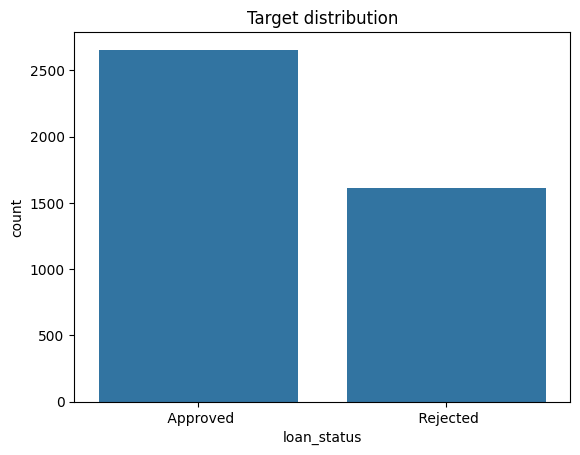

In [27]:
print('Using target column:', target_col)
display(df[target_col].value_counts(dropna=False))
sns.countplot(x=target_col, data=df)
plt.title('Target distribution')
plt.show()

In [28]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing>0]

Series([], dtype: int64)

In [29]:
target_col = "loan_status"
id_cols = ["loan_id"] 

In [30]:
df = df.drop(columns=id_cols, errors="ignore")

In [32]:
df_clf = df.dropna(subset=[target_col]).copy()
## Remove only those rows where the target column has NA

In [33]:
X = df_clf.drop(columns=[target_col])
y = df_clf[target_col].copy()

##### **Feature Types and drop id**

In [38]:
cat_cols = X.select_dtypes(include = ['str', 'category']).columns.tolist()
# num_cols = X.select_dtypes(include = ['int64']).columns.tolist()
num_cols = X.select_dtypes(include = [np.number]).columns.tolist()

In [40]:
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['education', 'self_employed']
Numerical columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


##### **Preprocessing Pipeline**

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [43]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [44]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [45]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')
## num and cat are the keys
## if at all there are some columns left from numerical or categorical transformation, simply drop them for transformation pipeline

##### **Stage 1 Classification Baseline**